# Two-Layer Fully Connected Network
Normal Unmodified Dataset

In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build the FC-500-150 model for MNIST
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model for 10 epochs
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1894 - accuracy: 0.9427 - val_loss: 0.0942 - val_accuracy: 0.9697
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0795 - accuracy: 0.9753 - val_loss: 0.0821 - val_accuracy: 0.9752
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0543 - accuracy: 0.9824 - val_loss: 0.0908 - val_accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0418 - accuracy: 0.9866 - val_loss: 0.0774 - val_accuracy: 0.9783
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0339 - accuracy: 0.9894 - val_loss: 0.0802 - val_accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0248 - accuracy: 0.9922 - val_loss: 0.0682 - val_accuracy: 0.9813
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0225 - accuracy: 0.9925 - val_loss: 0.0848 - val_ac

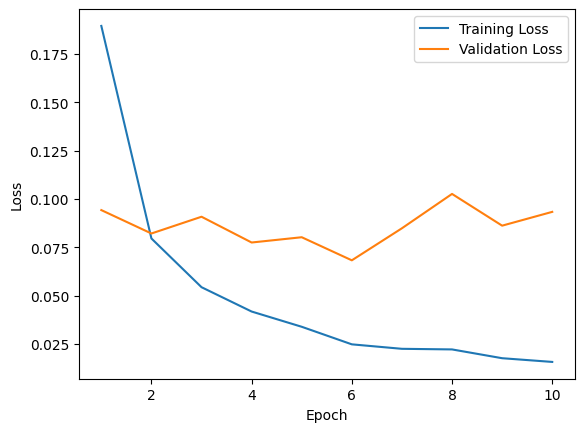

In [17]:
# Plot the loss
plt.plot(range(1,11),history.history['loss'], label='Training Loss')
plt.plot(range(1,11),history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
model.save("../Models/Mnist/mnist_model_2LFCN.karas")

INFO:tensorflow:Assets written to: ../Models/Mnist/mnist_model_2LFCN.karas\assets


INFO:tensorflow:Assets written to: ../Models/Mnist/mnist_model_2LFCN.karas\assets


# Two-Layer LeNet Convolutional Neural Network:
Normal Unmodified Dataset

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data and reshape for convolutional layers
train_images, test_images = train_images / 255.0, test_images / 255.0
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Build the LeNet-5 model for MNIST
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model for 10 epochs
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1892 - accuracy: 0.9416 - val_loss: 0.0850 - val_accuracy: 0.9713
Epoch 2/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0613 - accuracy: 0.9808 - val_loss: 0.0554 - val_accuracy: 0.9828
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0459 - accuracy: 0.9853 - val_loss: 0.0655 - val_accuracy: 0.9802
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0377 - accuracy: 0.9880 - val_loss: 0.0402 - val_accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0345 - val_accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0263 - accuracy: 0.9911 - val_loss: 0.0336 - val_accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0203 - accuracy: 0.9935 - val_loss: 0.0320 - val_ac

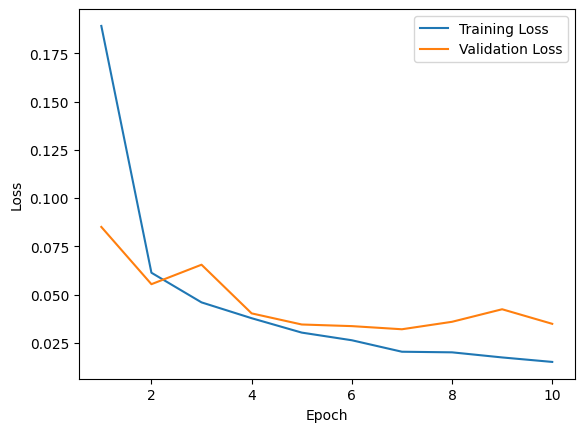

In [31]:
# Plot the loss
plt.plot(range(1,11),history.history['loss'], label='Training Loss')
plt.plot(range(1,11),history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
# Save the model
model.save("../Models/Mnist/mnist_model_LENET.karas")

INFO:tensorflow:Assets written to: ../Models/Mnist/mnist_model_LENET.karas\assets


INFO:tensorflow:Assets written to: ../Models/Mnist/mnist_model_LENET.karas\assets


# Load and test each model

In [27]:
import tensorflow as tf
# Load the fully connected model
fully_connected_model = tf.keras.models.load_model("../Models/MNIST/mnist_model_2LFCN.karas")
# Load the MNIST test dataset
mnist = tf.keras.datasets.mnist
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = test_images / 255.0
# Evaluate the accuracy of the fully connected model
fully_connected_loss, fully_connected_accuracy = fully_connected_model.evaluate(test_images, test_labels)
print(f"Fully Connected Model - Test Accuracy: {fully_connected_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 4ms/step - loss: 0.0372 - accuracy: 0.9895
Fully Connected Model - Test Accuracy: 98.95%


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the LeNet model
lenet_model = tf.keras.models.load_model("../Models/MNIST/mnist_model_LENET.karas")
# Load the MNIST test dataset
mnist = tf.keras.datasets.mnist
(_, _), (test_images, test_labels) = mnist.load_data()
test_images = test_images / 255.0
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
# Evaluate the accuracy of the LeNet model
lenet_loss, lenet_accuracy = lenet_model.evaluate(test_images, test_labels)
print(f"LeNet Model - Test Accuracy: {lenet_accuracy * 100:.2f}%")

313/313 [==============================] - 2s 4ms/step - loss: 0.0348 - accuracy: 0.9899
LeNet Model - Test Accuracy: 98.99%
